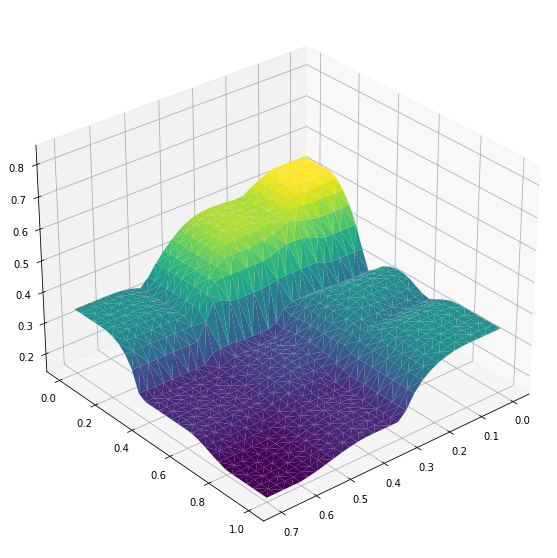

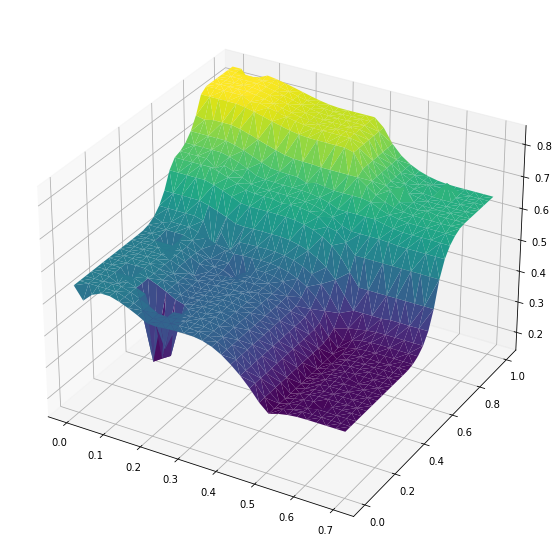

In [5]:
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mean_delay=ctrl.Antecedent(np.linspace(0,0.7,num=71),'mean_delay')
mean_delay['VS']=fuzz.trapmf(mean_delay.universe,[0,0,0.1,0.3])
mean_delay['S']=fuzz.trimf(mean_delay.universe,[0.1,0.3,0.5])
mean_delay['M']=fuzz.trapmf(mean_delay.universe,[0.4,0.6,0.7,0.7])
#mean_delay.view()

number_of_servers=ctrl.Antecedent(np.linspace(0,1,num=101),'number_of_servers')
number_of_servers['S']=fuzz.trapmf(number_of_servers.universe,[0,0,0.15,0.35])
number_of_servers['M']=fuzz.trimf(number_of_servers.universe,[0.3,0.5,0.7])
number_of_servers['L']=fuzz.trapmf(number_of_servers.universe,[0.6,0.8,1,1])
#number_of_servers.view()

utilisation_factor=ctrl.Antecedent(np.linspace(0,1,num=101),'utilisation_factor')
utilisation_factor['L']=fuzz.trapmf(utilisation_factor.universe,[0,0,0.4,0.6])
utilisation_factor['M']=fuzz.trimf(utilisation_factor.universe,[0.4,0.6,0.8])
utilisation_factor['H']=fuzz.trapmf(utilisation_factor.universe,[0.6,0.8,1,1])
#utilisation_factor.view()

number_of_spares=ctrl.Consequent(np.linspace(0,1,num=101),'number_of_spares')
number_of_spares['VS']=fuzz.trapmf(number_of_spares.universe,[0,0,0.1,0.3])
number_of_spares['S'] =fuzz.trimf(number_of_spares.universe,[0,0.2,0.4])
number_of_spares['RS']=fuzz.trimf(number_of_spares.universe,[0.25,0.35,0.45])
number_of_spares['M'] =fuzz.trimf(number_of_spares.universe,[0.3,0.5,0.7])
number_of_spares['RL']=fuzz.trimf(number_of_spares.universe,[0.55,0.65,0.75])
number_of_spares['L'] =fuzz.trimf(number_of_spares.universe,[0.6,0.8,1])
number_of_spares['VL']=fuzz.trapmf(number_of_spares.universe,[0.7,0.9,1,1])
#number_of_spares.view()

rule1=ctrl.Rule(utilisation_factor['L'] | (mean_delay['M'] & number_of_servers['M']) | (mean_delay['S']  & number_of_servers['L']), number_of_spares['S'])
rule2=ctrl.Rule(utilisation_factor['M'] | (mean_delay['M'] & number_of_servers['S']) | (mean_delay['VS'] & number_of_servers['L']), number_of_spares['M'])
rule3=ctrl.Rule(utilisation_factor['H'] | (mean_delay['S'] & number_of_servers['S']), number_of_spares['L'])
rule4=ctrl.Rule((mean_delay['M']  & number_of_servers['L']), number_of_spares['VS'])
rule5=ctrl.Rule((mean_delay['S']  & number_of_servers['M']), number_of_spares['RS'])
rule6=ctrl.Rule((mean_delay['VS'] & number_of_servers['M']), number_of_spares['RL'])
rule7=ctrl.Rule((mean_delay['VS'] & number_of_servers['S']), number_of_spares['VL'])

spare_control=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7])
spare_sys=ctrl.ControlSystemSimulation(spare_control)
# spare_sys.input['mean_delay']=0.6
# spare_sys.input['number_of_servers']=0.3
# spare_sys.input['utilisation_factor']=0.2
# result=spare_sys.compute()
# print(spare_sys.output['number_of_spares'])
# number_of_spares.view(sim=spare_sys)

x=[]
y=[]
z=[]
w=[]
for i in np.linspace(0,0.7,30):
    for j in np.linspace(0,1,30):
        for k in np.linspace(0,1,30):
            spare_sys.input['mean_delay']=i
            spare_sys.input['number_of_servers']=j
            spare_sys.input['utilisation_factor']=k
            spare_sys.compute()
            x.append(i)
            y.append(j)
            z.append(k)
            w.append(spare_sys.output["number_of_spares"])

x=np.array(x)
y=np.array(y)
z=np.array(z)
w=np.array(w)


fig = plt.figure(figsize=(10, 10))
a = fig.add_subplot(111, projection='3d')
a.plot_trisurf(x, y, w, cmap='viridis')
a.view_init(30,50)
plt.show()

fig = plt.figure(figsize=(10, 10))
a = fig.add_subplot(111, projection='3d')
a.plot_trisurf(x, z, w, cmap='viridis')
plt.show()

0.13788002734434243


/home/veno/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


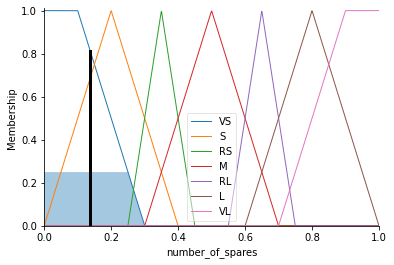

In [2]:
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mean_delay=ctrl.Antecedent(np.linspace(0,0.7,num=700),'mean_delay')
mean_delay['VS']=fuzz.trapmf(mean_delay.universe,[0,0,0.1,0.3])
mean_delay['S']=fuzz.trimf(mean_delay.universe,[0.1,0.3,0.5])
mean_delay['M']=fuzz.trapmf(mean_delay.universe,[0.4,0.6,0.7,0.7])
#mean_delay.view()

number_of_servers=ctrl.Antecedent(np.linspace(0,1,num=1000),'number_of_servers')
number_of_servers['S']=fuzz.trapmf(number_of_servers.universe,[0,0,0.15,0.35])
number_of_servers['M']=fuzz.trimf(number_of_servers.universe,[0.3,0.5,0.7])
number_of_servers['L']=fuzz.trapmf(number_of_servers.universe,[0.6,0.8,1,1])
#number_of_servers.view()

utilisation_factor=ctrl.Antecedent(np.linspace(0,1,num=1000),'utilisation_factor')
utilisation_factor['L']=fuzz.trapmf(utilisation_factor.universe,[0,0,0.4,0.6])
utilisation_factor['M']=fuzz.trimf(utilisation_factor.universe,[0.4,0.6,0.8])
utilisation_factor['H']=fuzz.trapmf(utilisation_factor.universe,[0.6,0.8,1,1])
#utilisation_factor.view()

number_of_spares=ctrl.Consequent(np.linspace(0,1,num=1000),'number_of_spares')
number_of_spares['VS']=fuzz.trapmf(number_of_spares.universe,[0,0,0.1,0.3])
number_of_spares['S'] =fuzz.trimf(number_of_spares.universe,[0,0.2,0.4])
number_of_spares['RS']=fuzz.trimf(number_of_spares.universe,[0.25,0.35,0.45])
number_of_spares['M'] =fuzz.trimf(number_of_spares.universe,[0.3,0.5,0.7])
number_of_spares['RL']=fuzz.trimf(number_of_spares.universe,[0.55,0.65,0.75])
number_of_spares['L'] =fuzz.trimf(number_of_spares.universe,[0.6,0.8,1])
number_of_spares['VL']=fuzz.trapmf(number_of_spares.universe,[0.7,0.9,1,1])
#number_of_spares.view()

rule1=ctrl.Rule((mean_delay['VS'] & number_of_servers['S'] & utilisation_factor['L']) |
                (mean_delay['S']  & number_of_servers['S'] & utilisation_factor['L']) |
                (mean_delay['M']  & number_of_servers['S'] & utilisation_factor['L']) |
                (mean_delay['VS'] & number_of_servers['M'] & utilisation_factor['L']) |
                (mean_delay['S']  & number_of_servers['M'] & utilisation_factor['L']) |
                (mean_delay['M']  & number_of_servers['M'] & utilisation_factor['L']) |
                (mean_delay['M']  & number_of_servers['M'] & utilisation_factor['L']) |
                (mean_delay['S']  & number_of_servers['S'] & utilisation_factor['M']) |
                (mean_delay['M']  & number_of_servers['S'] & utilisation_factor['M']) |
                (mean_delay['M']  & number_of_servers['M'] & utilisation_factor['M']) ,number_of_spares['VS'])

rule2=ctrl.Rule((mean_delay['VS'] & number_of_servers['L'] & utilisation_factor['L']) |
                (mean_delay['S']  & number_of_servers['L'] & utilisation_factor['L']) |
                (mean_delay['VS'] & number_of_servers['S'] & utilisation_factor['M']) |
                (mean_delay['S']  & number_of_servers['M'] & utilisation_factor['M']) |
                (mean_delay['M']  & number_of_servers['L'] & utilisation_factor['M']) |
                (mean_delay['M']  & number_of_servers['M'] & utilisation_factor['H']), number_of_spares['S'])

rule3=ctrl.Rule((mean_delay['VS'] & number_of_servers['M'] & utilisation_factor['M']) |
                (mean_delay['S']  & number_of_servers['L'] & utilisation_factor['M']) |
                (mean_delay['M']  & number_of_servers['L'] & utilisation_factor['H']) ,number_of_spares['RS'])

rule4=ctrl.Rule((mean_delay['VS'] & number_of_servers['L'] & utilisation_factor['M']) |
                (mean_delay['VS'] & number_of_servers['M'] & utilisation_factor['H']) |
                (mean_delay['S']  & number_of_servers['M'] & utilisation_factor['H']) |
                (mean_delay['S']  & number_of_servers['L'] & utilisation_factor['H']) |
                (mean_delay['M']  & number_of_servers['S'] & utilisation_factor['H']) ,number_of_spares['M'])

rule5=ctrl.Rule((mean_delay['VS'] & number_of_servers['L'] & utilisation_factor['H']) ,number_of_spares['RL'])

rule6=ctrl.Rule((mean_delay['S']  & number_of_servers['S'] & utilisation_factor['H']) ,number_of_spares['L'])

rule7=ctrl.Rule((mean_delay['VS'] & number_of_servers['S'] & utilisation_factor['H']) ,number_of_spares['VL'])

spare_control=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7])
spare_sys=ctrl.ControlSystemSimulation(spare_control)

x=[]
y=[]
z=[]
w=[]
for i in np.linspace(0,0.7,30):
    for j in np.linspace(0,1,30):
        for k in np.linspace(0,1,30):
            spare_sys.input['mean_delay']=i
            spare_sys.input['number_of_servers']=j
            spare_sys.input['utilisation_factor']=k
            spare_sys.compute()
            x.append(i)
            y.append(j)
            z.append(k)
            w.append(spare_sys.output["number_of_spares"])

x=np.array(x)
y=np.array(y)
z=np.array(z)
w=np.array(w)


fig = plt.figure(figsize=(10, 10))
a = fig.add_subplot(111, projection='3d')
a.plot_trisurf(x, y, w, cmap='viridis')
a.view_init(30,50)
plt.show()

fig = plt.figure(figsize=(10, 10))
a = fig.add_subplot(111, projection='3d')
a.plot_trisurf(x, z, w, cmap='viridis')
plt.show()

0.21274648226480924


/home/veno/.local/lib/python3.8/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


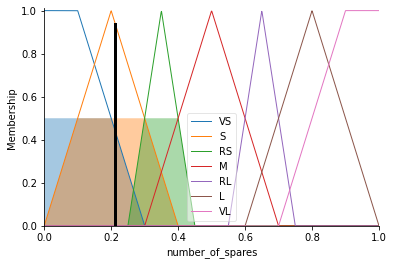

In [3]:
import skfuzzy as fuzz
import numpy as np
from skfuzzy import control as ctrl

mean_delay=ctrl.Antecedent(np.linspace(0,0.7,num=700),'mean_delay')
mean_delay['VS']=fuzz.trapmf(mean_delay.universe,[0,0,0.1,0.3])
mean_delay['S']=fuzz.trimf(mean_delay.universe,[0.1,0.3,0.5])
mean_delay['M']=fuzz.trapmf(mean_delay.universe,[0.4,0.6,0.7,0.7])
#mean_delay.view()

number_of_servers=ctrl.Antecedent(np.linspace(0,1,num=1000),'number_of_servers')
number_of_servers['S'] =fuzz.trapmf(number_of_servers.universe,[0,0,0.15,0.35])
number_of_servers['RS']=fuzz.trimf(number_of_servers.universe,[0.15,0.3,0.45])
number_of_servers['M'] =fuzz.trimf(number_of_servers.universe,[0.3,0.5,0.7])
number_of_servers['RL']=fuzz.trimf(number_of_servers.universe,[0.55,0.7,0.85])
number_of_servers['L'] =fuzz.trapmf(number_of_servers.universe,[0.6,0.8,1,1])
#number_of_servers.view()

utilisation_factor=ctrl.Antecedent(np.linspace(0,1,num=1000),'utilisation_factor')
utilisation_factor['L']=fuzz.trapmf(utilisation_factor.universe,[0,0,0.4,0.6])
utilisation_factor['M']=fuzz.trimf(utilisation_factor.universe,[0.4,0.6,0.8])
utilisation_factor['H']=fuzz.trapmf(utilisation_factor.universe,[0.6,0.8,1,1])
#utilisation_factor.view()

number_of_spares=ctrl.Consequent(np.linspace(0,1,num=1000),'number_of_spares')
number_of_spares['VS']=fuzz.trapmf(number_of_spares.universe,[0,0,0.1,0.3])
number_of_spares['S'] =fuzz.trimf(number_of_spares.universe,[0,0.2,0.4])
number_of_spares['RS']=fuzz.trimf(number_of_spares.universe,[0.25,0.35,0.45])
number_of_spares['M'] =fuzz.trimf(number_of_spares.universe,[0.3,0.5,0.7])
number_of_spares['RL']=fuzz.trimf(number_of_spares.universe,[0.55,0.65,0.75])
number_of_spares['L'] =fuzz.trimf(number_of_spares.universe,[0.6,0.8,1])
number_of_spares['VL']=fuzz.trapmf(number_of_spares.universe,[0.7,0.9,1,1])
#number_of_spares.view()

rule1=ctrl.Rule((mean_delay['VS'] & number_of_servers['S']  & utilisation_factor['L']) |
                (mean_delay['S']  & number_of_servers['S']  & utilisation_factor['L']) |
                (mean_delay['M']  & number_of_servers['S']  & utilisation_factor['L']) |
                (mean_delay['VS'] & number_of_servers['RS'] & utilisation_factor['L']) |
                (mean_delay['S']  & number_of_servers['RS'] & utilisation_factor['L']) |
                (mean_delay['M']  & number_of_servers['RS'] & utilisation_factor['L']) |
                (mean_delay['VS'] & number_of_servers['M']  & utilisation_factor['L']) |
                (mean_delay['S']  & number_of_servers['M']  & utilisation_factor['L']) |
                (mean_delay['M']  & number_of_servers['M']  & utilisation_factor['L']) |
                (mean_delay['M']  & number_of_servers['RL'] & utilisation_factor['L']) |
                (mean_delay['M']  & number_of_servers['L']  & utilisation_factor['L']) |
                (mean_delay['S']  & number_of_servers['S']  & utilisation_factor['M']) |
                (mean_delay['M']  & number_of_servers['S']  & utilisation_factor['M']) |
                (mean_delay['S']  & number_of_servers['RS'] & utilisation_factor['M']) |
                (mean_delay['M']  & number_of_servers['RS'] & utilisation_factor['M']) |
                (mean_delay['M']  & number_of_servers['M']  & utilisation_factor['M']) ,number_of_spares['VS'])

rule2=ctrl.Rule((mean_delay['VS'] & number_of_servers['RL'] & utilisation_factor['L']) |
                (mean_delay['S']  & number_of_servers['RL'] & utilisation_factor['L']) |
                (mean_delay['VS'] & number_of_servers['L']  & utilisation_factor['L']) |
                (mean_delay['S']  & number_of_servers['L']  & utilisation_factor['L']) |
                (mean_delay['VS'] & number_of_servers['S']  & utilisation_factor['M']) |
                (mean_delay['VS'] & number_of_servers['RS'] & utilisation_factor['M']) |
                (mean_delay['S']  & number_of_servers['M']  & utilisation_factor['M']) |
                (mean_delay['M']  & number_of_servers['RL'] & utilisation_factor['M']) |
                (mean_delay['M']  & number_of_servers['L']  & utilisation_factor['M']) |
                (mean_delay['M']  & number_of_servers['M']  & utilisation_factor['H']), number_of_spares['S'])

rule3=ctrl.Rule((mean_delay['VS'] & number_of_servers['M']  & utilisation_factor['M']) |
                (mean_delay['S']  & number_of_servers['RL'] & utilisation_factor['M']) |
                (mean_delay['S']  & number_of_servers['L']  & utilisation_factor['M']) |
                (mean_delay['M']  & number_of_servers['RS'] & utilisation_factor['H']) |
                (mean_delay['M']  & number_of_servers['RL'] & utilisation_factor['H']) |
                (mean_delay['M']  & number_of_servers['L']  & utilisation_factor['H']) ,number_of_spares['RS'])

rule4=ctrl.Rule((mean_delay['VS'] & number_of_servers['RL'] & utilisation_factor['M']) |
                (mean_delay['VS'] & number_of_servers['L']  & utilisation_factor['M']) |
                (mean_delay['M']  & number_of_servers['S']  & utilisation_factor['H']) |
                (mean_delay['VS'] & number_of_servers['M']  & utilisation_factor['H']) |
                (mean_delay['S']  & number_of_servers['M']  & utilisation_factor['H']) |
                (mean_delay['S']  & number_of_servers['RL'] & utilisation_factor['H']) |
                (mean_delay['S']  & number_of_servers['L']  & utilisation_factor['H']) ,number_of_spares['M'])

rule5=ctrl.Rule((mean_delay['S']  & number_of_servers['RS'] & utilisation_factor['H']) |
                (mean_delay['VS'] & number_of_servers['RL'] & utilisation_factor['H']) ,number_of_spares['RL'])

rule6=ctrl.Rule((mean_delay['S']  & number_of_servers['S'] & utilisation_factor['H'])  |
                (mean_delay['VS'] & number_of_servers['L'] & utilisation_factor['H'])  ,number_of_spares['L'])

rule7=ctrl.Rule((mean_delay['VS'] & number_of_servers['S']  & utilisation_factor['H']) |
                (mean_delay['VS'] & number_of_servers['RS'] & utilisation_factor['H']) ,number_of_spares['VL'])

spare_control=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7])
spare_sys=ctrl.ControlSystemSimulation(spare_control)

spare_sys.input['mean_delay']=0.2
spare_sys.input['number_of_servers']=0.5
spare_sys.input['utilisation_factor']=0.5

result=spare_sys.compute()
print(spare_sys.output['number_of_spares'])

number_of_spares.view(sim=spare_sys)